https://google.github.io/adk-docs/

In [ ]:
from dotenv import load_dotenv
load_dotenv(dotenv_path="D:\Learning\.env")

True

In [2]:
from dotenv import load_dotenv
import os

load_dotenv()
api_key = os.getenv("GOOGLE_API_KEY")
if api_key:
    print("Google API key found and loaded successfully!")
else:
    print("Google API key not found.")

Google API key found and loaded successfully!


In [4]:
from google.adk.agents import Agent, SequentialAgent, ParallelAgent, LoopAgent
from google.adk.runners import InMemoryRunner
from google.adk.tools import AgentTool, FunctionTool, google_search
from google.genai import types

print("✅ ADK components imported successfully.")

✅ ADK components imported successfully.


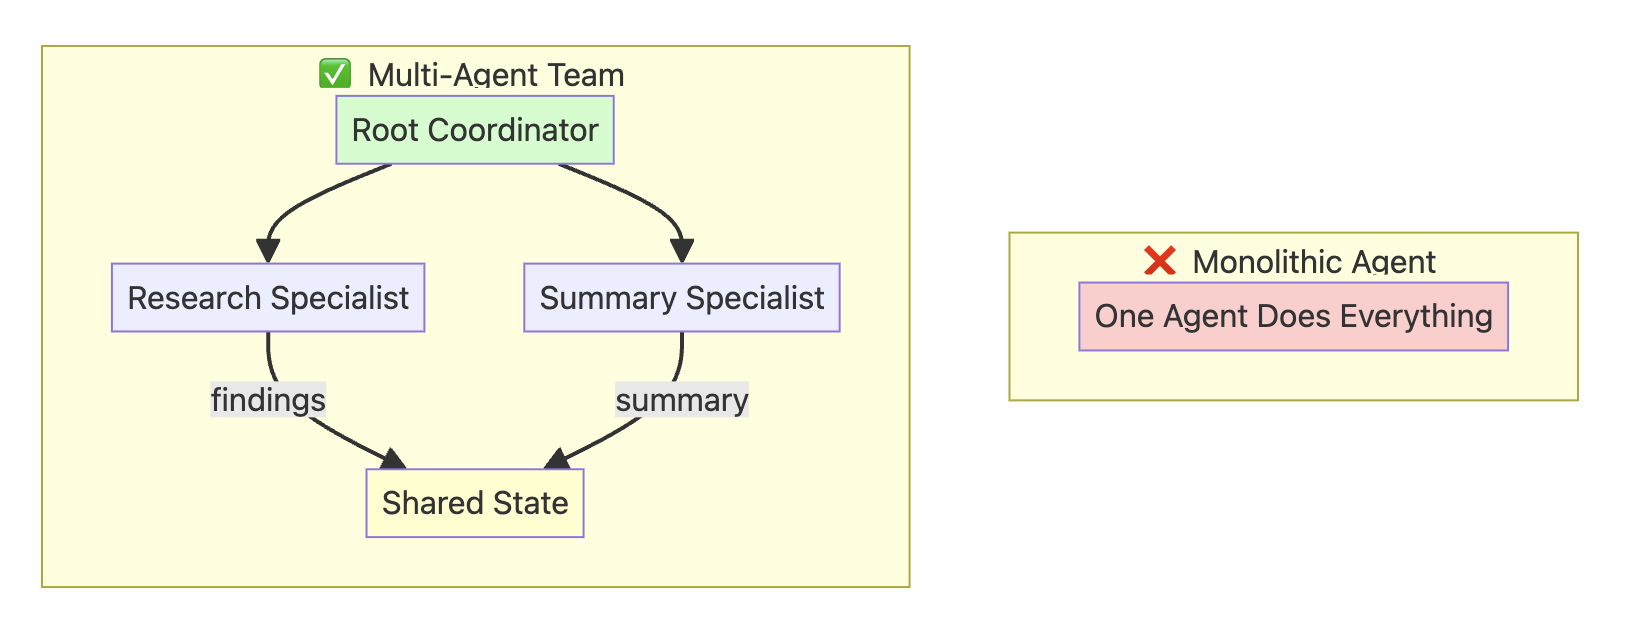

In [5]:
# Research Agent: Its job is to use the google_search tool and present findings.
research_agent = Agent(
    name="ResearchAgent",
    model="gemini-2.5-flash-lite",
    instruction="""You are a specialized research agent. Your only job is to use the
    google_search tool to find 2-3 pieces of relevant information on the given topic and present the findings with citations.""",
    tools=[google_search],
    output_key="research_findings", # The result of this agent will be stored in the session state with this key.
)

print("✅ research_agent created.")

✅ research_agent created.


In [6]:
# Summarizer Agent: Its job is to summarize the text it receives.
summarizer_agent = Agent(
    name="SummarizerAgent",
    model="gemini-2.5-flash-lite",
    # The instruction is modified to request a bulleted list for a clear output format.
    instruction="""Read the provided research findings: {research_findings}
Create a concise summary as a bulleted list with 3-5 key points.""",
    output_key="final_summary",
)

print("✅ summarizer_agent created.")

✅ summarizer_agent created.


In [7]:
# Root Coordinator: Orchestrates the workflow by calling the sub-agents as tools.
root_agent = Agent(
    name="ResearchCoordinator",
    model="gemini-2.5-flash-lite",
    # This instruction tells the root agent HOW to use its tools (which are the other agents).
    instruction="""You are a research coordinator. Your goal is to answer the user's query by orchestrating a workflow.
1. First, you MUST call the `ResearchAgent` tool to find relevant information on the topic provided by the user.
2. Next, after receiving the research findings, you MUST call the `SummarizerAgent` tool to create a concise summary.
3. Finally, present the final summary clearly to the user as your response.""",
    # We wrap the sub-agents in `AgentTool` to make them callable tools for the root agent.
    tools=[
        AgentTool(research_agent),
        AgentTool(summarizer_agent)
    ],
)

print("✅ root_agent created.")

✅ root_agent created.


In [8]:
runner = InMemoryRunner(agent=root_agent)
response = await runner.run_debug("What are the latest advancements in quantum computing and what do they mean for AI?")


 ### Created new session: debug_session_id

User > What are the latest advancements in quantum computing and what do they mean for AI?


ResearchCoordinator > The latest advancements in quantum computing are poised to revolutionize AI by significantly accelerating data processing and enabling more efficient algorithms. This synergy is expected to enhance AI capabilities in areas such as optimization, generative modeling, and tackling complex scientific problems previously out of reach for classical computers. Key breakthroughs in quantum error correction, hybrid quantum-classical approaches, and qubit technology are driving this progress. Consequently, the convergence of quantum computing and AI promises transformative impacts across various industries, including healthcare, finance, and cybersecurity, by offering unprecedented efficiency and novel solutions.


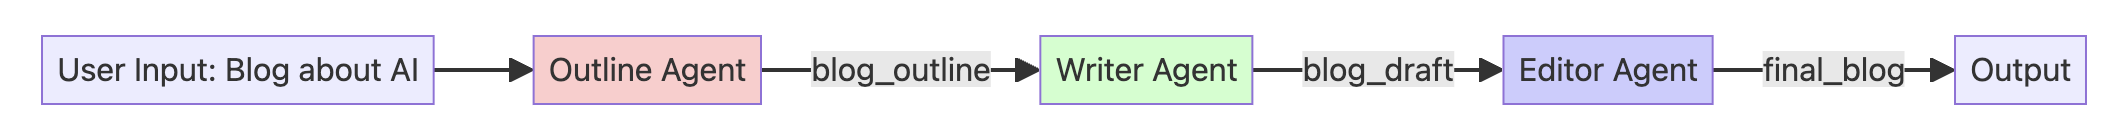

In [9]:
# Outline Agent: Creates the initial blog post outline.
outline_agent = Agent(
    name="OutlineAgent",
    model="gemini-2.5-flash-lite",
    instruction="""Create a blog outline for the given topic with:
    1. A catchy headline
    2. An introduction hook
    3. 3-5 main sections with 2-3 bullet points for each
    4. A concluding thought""",
    output_key="blog_outline", # The result of this agent will be stored in the session state with this key.
)

print("✅ outline_agent created.")

✅ outline_agent created.


In [10]:
# Writer Agent: Writes the full blog post based on the outline from the previous agent.
writer_agent = Agent(
    name="WriterAgent",
    model="gemini-2.5-flash-lite",
    # The `{blog_outline}` placeholder automatically injects the state value from the previous agent's output.
    instruction="""Following this outline strictly: {blog_outline}
    Write a brief, 200 to 300-word blog post with an engaging and informative tone.""",
    output_key="blog_draft", # The result of this agent will be stored with this key.
)

print("✅ writer_agent created.")

✅ writer_agent created.


In [11]:
# Editor Agent: Edits and polishes the draft from the writer agent.
editor_agent = Agent(
    name="EditorAgent",
    model="gemini-2.5-flash-lite",
    # This agent receives the `{blog_draft}` from the writer agent's output.
    instruction="""Edit this draft: {blog_draft}
    Your task is to polish the text by fixing any grammatical errors, improving the flow and sentence structure, and enhancing overall clarity.""",
    output_key="final_blog", # This is the final output of the entire pipeline.
)

print("✅ editor_agent created.")

✅ editor_agent created.


In [12]:
root_agent = SequentialAgent(
    name="BlogPipeline",
    sub_agents=[outline_agent, writer_agent, editor_agent],
)

print("✅ Sequential Agent created.")

✅ Sequential Agent created.


In [13]:
runner = InMemoryRunner(agent=root_agent)
response = await runner.run_debug("Write a blog post about the benefits of multi-agent systems for software developers")


 ### Created new session: debug_session_id

User > Write a blog post about the benefits of multi-agent systems for software developers
OutlineAgent > ## Blog Outline: Multi-Agent Systems for Software Developers

**Catchy Headline:** Supercharge Your Software: How Multi-Agent Systems Are Revolutionizing Development

**Introduction Hook:** Ever feel like your software projects are a solo act, struggling to handle complex tasks and adapt to changing demands? Imagine a team of intelligent, independent agents working tirelessly behind the scenes, collaborating to build more robust, efficient, and adaptable software. Welcome to the world of Multi-Agent Systems (MAS), and discover how they can transform your development process.

---

**Main Section 1: Understanding the Power of Collaboration**

*   **What Exactly is a Multi-Agent System?**
    *   Briefly define MAS as a system composed of multiple interacting intelligent agents.
    *   Highlight the concept of agents having individual goa

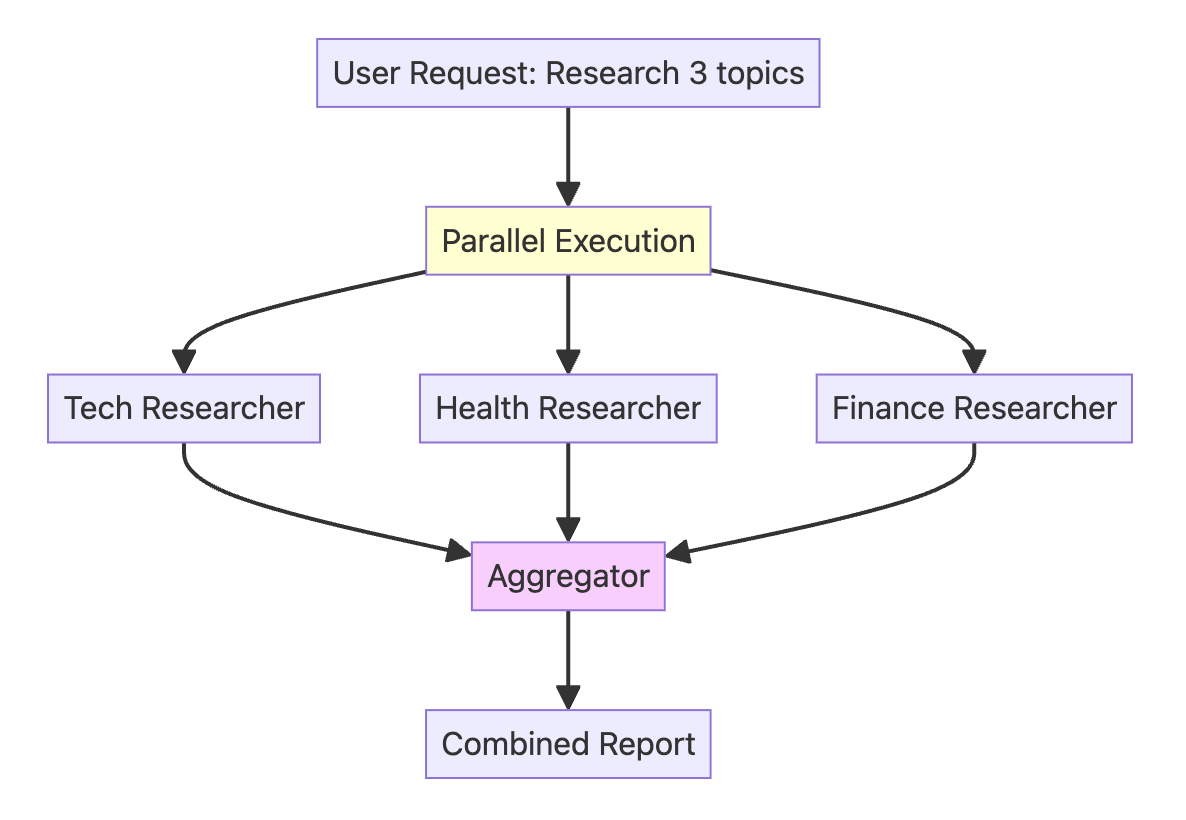

In [14]:
# Tech Researcher: Focuses on AI and ML trends.
tech_researcher = Agent(
    name="TechResearcher",
    model="gemini-2.5-flash-lite",
    instruction="""Research the latest AI/ML trends. Include 3 key developments,
the main companies involved, and the potential impact. Keep the report very concise (100 words).""",
    tools=[google_search],
    output_key="tech_research", # The result of this agent will be stored in the session state with this key.
)

print("✅ tech_researcher created.")

✅ tech_researcher created.


In [15]:
# Health Researcher: Focuses on medical breakthroughs.
health_researcher = Agent(
    name="HealthResearcher",
    model="gemini-2.5-flash-lite",
    instruction="""Research recent medical breakthroughs. Include 3 significant advances,
their practical applications, and estimated timelines. Keep the report concise (100 words).""",
    tools=[google_search],
    output_key="health_research", # The result will be stored with this key.
)

print("✅ health_researcher created.")

✅ health_researcher created.


In [16]:
# Finance Researcher: Focuses on fintech trends.
finance_researcher = Agent(
    name="FinanceResearcher",
    model="gemini-2.5-flash-lite",
    instruction="""Research current fintech trends. Include 3 key trends,
their market implications, and the future outlook. Keep the report concise (100 words).""",
    tools=[google_search],
    output_key="finance_research", # The result will be stored with this key.
)

print("✅ finance_researcher created.")

✅ finance_researcher created.


In [17]:
# The AggregatorAgent runs *after* the parallel step to synthesize the results.
aggregator_agent = Agent(
    name="AggregatorAgent",
    model="gemini-2.5-flash-lite",
    # It uses placeholders to inject the outputs from the parallel agents, which are now in the session state.
    instruction="""Combine these three research findings into a single executive summary:

    **Technology Trends:**
    {tech_research}
    
    **Health Breakthroughs:**
    {health_research}
    
    **Finance Innovations:**
    {finance_research}
    
    Your summary should highlight common themes, surprising connections, and the most important key takeaways from all three reports. The final summary should be around 200 words.""",
    output_key="executive_summary", # This will be the final output of the entire system.
)

print("✅ aggregator_agent created.")

✅ aggregator_agent created.


In [18]:
# The ParallelAgent runs all its sub-agents simultaneously.
parallel_research_team = ParallelAgent(
    name="ParallelResearchTeam",
    sub_agents=[tech_researcher, health_researcher, finance_researcher],
)

# This SequentialAgent defines the high-level workflow: run the parallel team first, then run the aggregator.
root_agent = SequentialAgent(
    name="ResearchSystem",
    sub_agents=[parallel_research_team, aggregator_agent],
)

print("✅ Parallel and Sequential Agents created.")

✅ Parallel and Sequential Agents created.


In [19]:
runner = InMemoryRunner(agent=root_agent)
response = await runner.run_debug("Run the daily executive briefing on Tech, Health, and Finance")


 ### Created new session: debug_session_id

User > Run the daily executive briefing on Tech, Health, and Finance
HealthResearcher > Here's a brief on recent breakthroughs in Health, Tech, and Finance:

**Health:** Artificial intelligence is revolutionizing diagnostics and treatment plans, with AI in healthcare projected to reach $614 billion by 2034. Advances in gene sequencing can rapidly identify dangerous mutations. Teplizumab, a drug approved in late 2022, can delay the onset of Type 1 diabetes for years.

**Tech:** Quantum computing, while still developing, shows promise for drug discovery and cryptography. Brain-computer interfaces (BCIs) are nearing practical application for controlling devices with thoughts, potentially aiding individuals with paralysis. AI is increasingly integrated into businesses, with 67% of companies using it for tasks like scheduling and data analysis by 2025.

**Finance:** Generative AI is enhancing financial services through personalized advice and aut

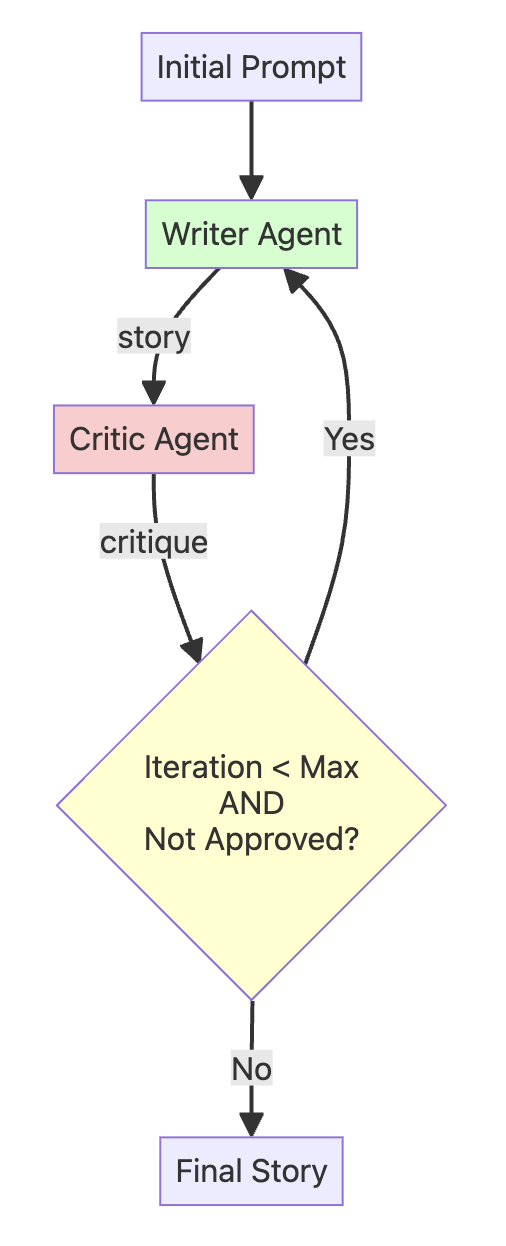

In [20]:
# This agent runs ONCE at the beginning to create the first draft.
initial_writer_agent = Agent(
    name="InitialWriterAgent",
    model="gemini-2.5-flash-lite",
    instruction="""Based on the user's prompt, write the first draft of a short story (around 100-150 words).
    Output only the story text, with no introduction or explanation.""",
    output_key="current_story", # Stores the first draft in the state.
)

print("✅ initial_writer_agent created.")

✅ initial_writer_agent created.


In [21]:
# This agent's only job is to provide feedback or the approval signal. It has no tools.
critic_agent = Agent(
    name="CriticAgent",
    model="gemini-2.5-flash-lite",
    instruction="""You are a constructive story critic. Review the story provided below.
    Story: {current_story}
    
    Evaluate the story's plot, characters, and pacing.
    - If the story is well-written and complete, you MUST respond with the exact phrase: "APPROVED"
    - Otherwise, provide 2-3 specific, actionable suggestions for improvement.""",
    output_key="critique", # Stores the feedback in the state.
)

print("✅ critic_agent created.")

✅ critic_agent created.


In [22]:
# This is the function that the RefinerAgent will call to exit the loop.
def exit_loop():
    """Call this function ONLY when the critique is 'APPROVED', indicating the story is finished and no more changes are needed."""
    return {"status": "approved", "message": "Story approved. Exiting refinement loop."}

print("✅ exit_loop function created.")

✅ exit_loop function created.


In [24]:
# This agent refines the story based on critique OR calls the exit_loop function.
refiner_agent = Agent(
    name="RefinerAgent",
    model="gemini-2.5-flash-lite",
    instruction="""You are a story refiner. You have a story draft and critique.
    
    Story Draft: {current_story}
    Critique: {critique}
    
    Your task is to analyze the critique.
    - IF the critique is EXACTLY "APPROVED", you MUST call the `exit_loop` function and nothing else.
    - OTHERWISE, rewrite the story draft to fully incorporate the feedback from the critique.""",
    
    output_key="current_story", # It overwrites the story with the new, refined version.
    tools=[FunctionTool(exit_loop)], # The tool is now correctly initialized with the function reference.
)
print("✅ refiner_agent created.")

✅ refiner_agent created.


In [25]:
# The LoopAgent contains the agents that will run repeatedly: Critic -> Refiner.
story_refinement_loop = LoopAgent(
    name="StoryRefinementLoop",
    sub_agents=[critic_agent, refiner_agent],
    max_iterations=2, # Prevents infinite loops
)

# The root agent is a SequentialAgent that defines the overall workflow: Initial Write -> Refinement Loop.
root_agent = SequentialAgent(
    name="StoryPipeline",
    sub_agents=[initial_writer_agent, story_refinement_loop],
)

print("✅ Loop and Sequential Agents created.")

✅ Loop and Sequential Agents created.


In [28]:
runner = InMemoryRunner(agent=root_agent)
response = await runner.run_debug("Write a short story about a lighthouse keeper who discovers a mysterious, glowing map")


 ### Created new session: debug_session_id

User > Write a short story about a lighthouse keeper who discovers a mysterious, glowing map
InitialWriterAgent > The salt spray kissed Elias's weathered face as he ascended the winding stairs, the lantern's beam a familiar, comforting pulse against the inky black. Tonight, however, something was different. Tucked into a crevice near the lantern room, a rolled parchment lay half-hidden. It wasn't the usual debris of a storm. Unfurling it, Elias gasped. The paper, brittle and ancient, shimmered with an ethereal light. Intricate lines, etched in a luminous, unknown script, formed a map of the treacherous coastline, but with islands and currents he'd never charted. A single, pulsating star marked a spot far out at sea. The map hummed softly in his hands, a silent invitation to a mystery he couldn't ignore.
CriticAgent > This is a promising start to a story, establishing a strong atmosphere and a clear inciting incident. Here are some suggestion

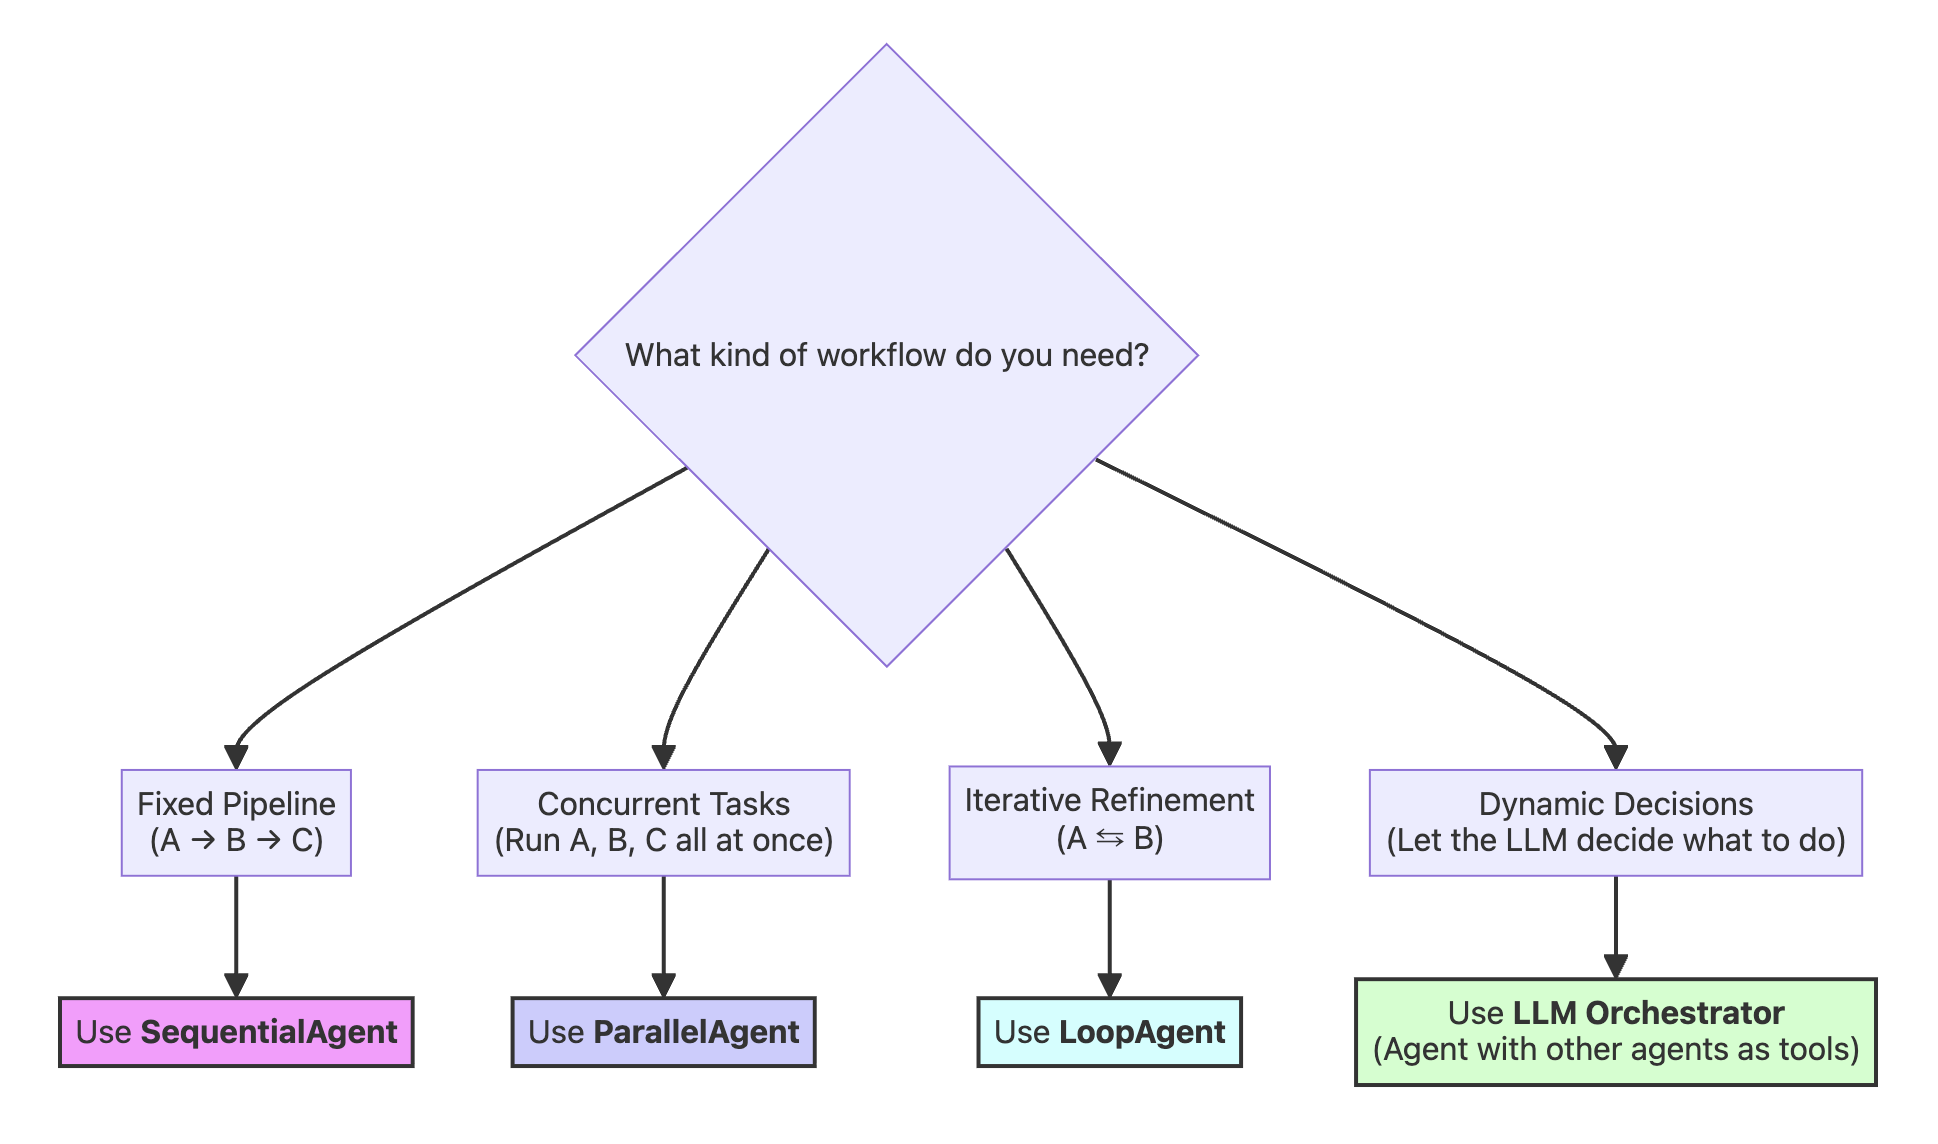

# https://cloud.google.com/architecture/choose-design-pattern-agentic-ai-system